# COMP4221-T2

## Python basic

This part of notebook credits by [cs228](https://github.com/kuleshov/teaching-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb).

Python is a great general-purpose programming language on its own, but with the help of a few popular libraries (numpy, scipy, matplotlib) it becomes a powerful environment for scientific computing.

Some of you may have previous knowledge in Matlab, in which case we also recommend the numpy for [Matlab users page](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html).

### Hello World

In [1]:
print('Hello world from COMP4221')

Hello world from COMP4221


### Types & Operations

#### Numbers

In [2]:
x = 114514
print(x, type(x))
y = 1919810.
print(y, type(y))

114514 <class 'int'>
1919810.0 <class 'float'>


In [3]:
print(x + 1919810)    # Addition;
print(x - 1919810)    # Subtraction;
print(x * 1919810)    # Multiplication;
print(x // 1919810)   # Integer Division;
print(x / 1919810)    # Division;
print(x ** 20)        # Exponentiation;
# matrix multiplication: @

2034324
-1805296
219845122340
0
0.05964861106046952
150373635229950886663758295582434037200633466483715311561241291591000359303505066112699986840912920576


In [4]:
x += 1
print(x)
x *= 2
print(x)

114515
229030


#### Booleans

In [5]:
t, f = True, False
print(t, type(t), f, type(f))

True <class 'bool'> False <class 'bool'>


In [6]:
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t)   # Logical NOT;
print(t != f)  # Logical XOR;

False
True
False
True


#### Strings

In [7]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter.
print(hello, type(hello), len(hello))

hello <class 'str'> 5


In [8]:
hw = hello + ' ' + world  # String concatenation
print(hw)  # prints "hello world"

hello world


You can find a list of all string methods in the [documentation](https://docs.python.org/2/library/stdtypes.html#string-methods).

### Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples.

#### Lists

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [9]:
xs = [3, 1, 2]   # Create a list
print(xs, xs[2])
print(xs[-1])     # Negative indices count from the end of the list; prints "2"

[3, 1, 2] 2
2


In [10]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)

[3, 1, 'foo']


In [11]:
xs.append('bar') # Add a new element to the end of the list
print(xs)

[3, 1, 'foo', 'bar']


In [12]:
x = xs.pop()     # Remove and return the last element of the list
print(x, xs) 

bar [3, 1, 'foo']


As usual, you can find all the gory details about lists in the [documentation](https://docs.python.org/2/tutorial/datastructures.html#more-on-lists).

#### Loops

You can loop over the elements of a list like this:

In [13]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


### Packages

Packages in python are some programs pre-written by others for us to use in a few lines. To use packages, we need to first install them by `conda` or `pip` as taught in the last tutorial. After installing them, we can simply `import` them, then we can use those powerful programs from giants.

For example, if we want to use `sci-learn`, we can simply `import skearn`.

In [14]:
import sklearn

Then we can use any functions or classes from `sci-learn`. For example, we want to check the version of the installed `ski-learn`.

In [15]:
print(sklearn.__version__)

0.23.2


We can import only parts of the packages, and also give them alias for convenience.

In [16]:
from sklearn import __version__ as sklearn_version
print(sklearn_version)

0.23.2


## Perceptron algorithm in plain Python

The perceptron is a simple supervised machine learning algorithm and one of the earliest **neural network** architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a **binary linear classifier** that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane.

The perceptron as follows.

**Given:** 
- dataset $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
- with $\boldsymbol{x}^{(i)}$ being a $d-$dimensional vector $\boldsymbol{x}^i = (x^{(i)}_1, ..., x^{(i)}_d)$
- $y^{(i)}$ being a binary target variable, $y^{(i)} \in \{0,1\}$

The perceptron is a very simple neural network:
- it has a real-valued weight vector $\boldsymbol{w}= (w^{(1)}, ..., w^{(d)})$
- it has a real-valued bias $b$
- it uses the Heaviside step function as its activation function

* * *

**Step 1:** Initialize the weight vector and bias with zeros (or small random values).
* * *

**Step 2:** Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting:
$$\boldsymbol{a} = \boldsymbol{X} \cdot \boldsymbol{w} + b$$

where $\boldsymbol{X}$ is a matrix of shape $(n_{samples}, n_{features})$ that holds all training examples, and $\cdot$ denotes the dot product.
* * *

**Step 3:** Apply the Heaviside function, which returns binary values:

$$\hat{y}^{(i)} = 1 \, if \, a^{(i)} \geq 0, \, else \, 0$$
* * *

**Step 4:** Update the weights and bias, which could be done by sklearn automatically

Import needed packages and set the random seed manually to reproduce the result.

In [17]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

np.random.seed(123)

Make the dataset in 2D.

<IPython.core.display.Javascript object>


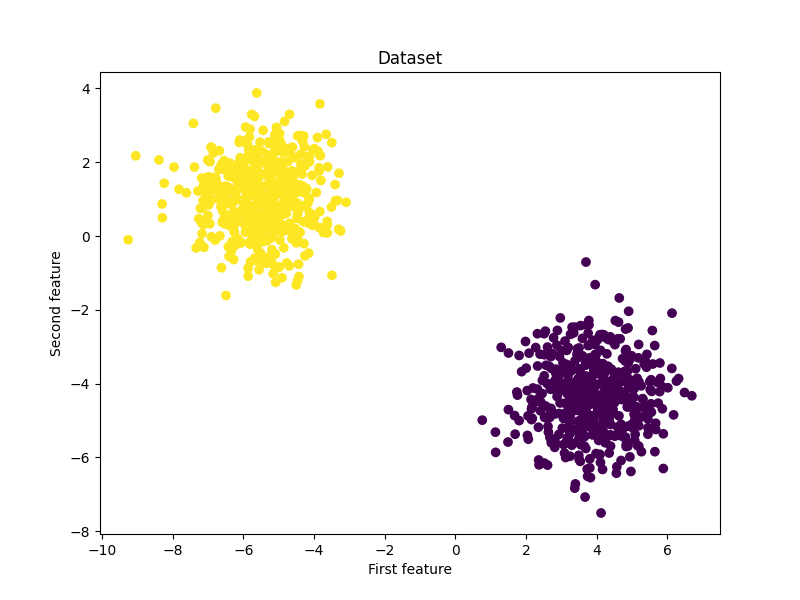

In [18]:
X, y = make_blobs(n_samples=1000, centers=2)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

Split the dataset into training set and testing set.

In [19]:
y_true = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y_true)
y_train = y_train.squeeze()
y_test = y_test.squeeze()

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750,)
Shape X_test: (250, 2)
Shape y_test: (250,)


In [20]:
p = Perceptron(max_iter=10, verbose=1, random_state=1)

In [21]:
p.fit(X_train, y_train)

-- Epoch 1
Norm: 5.97, NNZs: 2, Bias: -1.000000, T: 750, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 5.97, NNZs: 2, Bias: -1.000000, T: 1500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.97, NNZs: 2, Bias: -1.000000, T: 2250, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.97, NNZs: 2, Bias: -1.000000, T: 3000, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 5.97, NNZs: 2, Bias: -1.000000, T: 3750, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 5.97, NNZs: 2, Bias: -1.000000, T: 4500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds


Perceptron(max_iter=10, random_state=1, verbose=1)

In [22]:
y_p_train = p.predict(X_train)
y_p_test = p.predict(X_test)

print(f"training accuracy: {p.score(X_train, y_train) * 100}%")
print(f"test accuracy: {p.score(X_train, y_train) * 100}%")

training accuracy: 100.0%
test accuracy: 100.0%


Plot the result on all data and the dicision hyperplane:

a=4.76699308140582, b=-3.5881776473365594


<IPython.core.display.Javascript object>


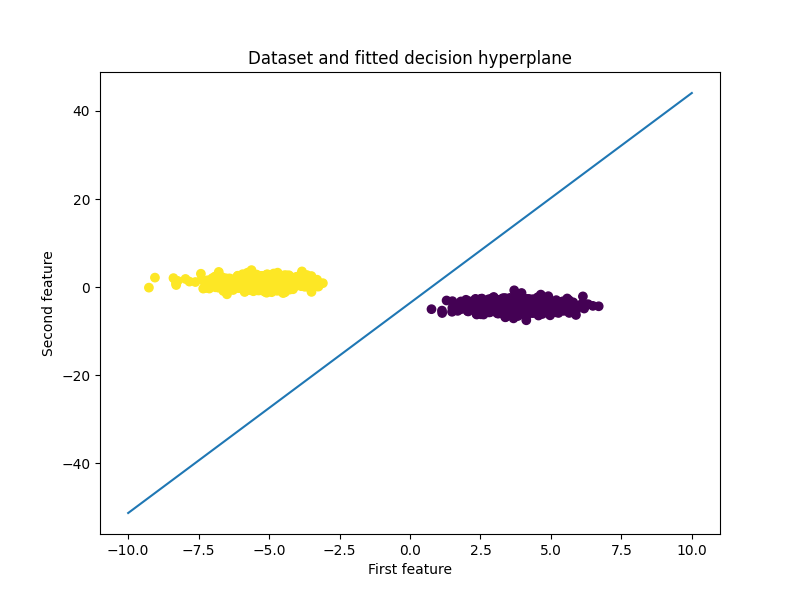

In [25]:
# weights learnt
b, a  = p.coef_[0]
print(f"a={a}, b={b}")
ys = a * Xs + b
Xs = np.linspace(-10,10,10)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(Xs, ys, '-')
plt.title("Dataset and fitted decision hyperplane")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()